<br>
<hr>
<p><b>PASO 3 - DESARROLLO FASE 2: PREPROCESAMIENTO</b></p>
<hr>
<br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/BASE PARA ANALISIS-M2A.csv', sep='|')
df.head(1)

,VERIFICACION,ESTADO,1.- Nombres y Apellidos del encuestado (Adulto mayor),3.- Código del sujeto (ECU-IUTA-R-XXX),EDAD,2.- profesion,6.- Sexo,7.- Estado civil,9.- Lateralidad,10.- Déficit sensorial Física,...,Medicion eficiencia Coda directo,Tareas Alexa Inverso 3-4=2;5-6=3;7-8=4,Medicion efectividad Coda Inverso,Tiempo Coda Inverso,Medicion eficiencia Coda Inverso,Tareas Alexa Coda colores 2=1;4=2;6=3;8=4,Medicion efectividad Coda colores,Tiempo Coda colores,Medicion eficiencia Coda colores,firma de consentimiento
0,NaN,APTO-V1,Gomez Coello Saida Ruth,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,...,100,2,25.0,3,0.0,4,100,15,NaN,NaN


In [ ]:
print(f'\n---- CSV ----\nNúmero de filas: {df.shape[0]}\nNúmero de Columnas: {df.shape[1]}\n')


---- CSV ----
Número de filas: 75
Número de Columnas: 345



In [ ]:
dic_datos = {}
with open('/content/sample_data/guia2_dic_datos.txt', 'r') as archivo:
    for linea in archivo:
        linea = linea.strip()
        if '|' in linea:
            clave, valor = linea.split('|', 1)
            dic_datos[clave] = valor


# Número de datos en el Diccionario.
print(f'\n---- DIC ----\nNúmero de datos: {len(dic_datos)}\n')


---- DIC ----
Número de datos: 345



In [ ]:
nom_columnas = list(dic_datos.keys())
df.columns = nom_columnas
df.head(7)

,Verificacion,Estado,ApellidosNombres,CodSuj,Edad,Profesion,Sexo,ECivil,Lateralidad,DSF,...,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,MedEficCidaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,MedEficCodaCol,FrmConsentimiento
0,NaN,APTO-V1,Gomez Coello Saida Ruth,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,...,100,2,25.0,3,0.0,4,100,15,NaN,NaN
1,x,APTO-V1,LOJANO VILLA ROGELIO JAIME,ECU-ISTA-E-058,78,agricultor,Hombre,Viudo/a,Diestro,Ninguno,...,250,2,25.0,1,0.0,4,100,13,NaN,NaN
2,x,APTO-V1,LOPEZ MORA NINFA PIEDAD,ECU-ISTA-E-090,73,ama de casa,Hombre,Viudo/a,Diestro,Ninguno,...,50,2,25.0,3,0.0,4,100,10,NaN,NaN
3,x,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,...,100,2,25.0,2,NaN,3,75,9,NaN,0.0
4,x,APTO-V1,GALLEGOS LUIS ANTONIO,ECU-ISTA-E-095,79,agricultor,Hombre,Viudo/a,Diestro,Ninguno,...,150,0,0.0,2,NaN,2,50,3,NaN,0.0
5,x,APTO-V1,QUEZADA MARIA ROSARIO,ECU-ISTA-E-096,70,ama de casa,Mujer,Divorciado/a,Diestro,Ninguno,...,100,0,0.0,2,NaN,2,50,2,NaN,0.0
6,x,TENESACA LOJANO LUISA CELESTINA,NaN,ECU-ISTA-E-097,67,ama de casa,Mujer,Casado/a,Diestro,Ninguno,...,50,0,0.0,5,NaN,2,50,9,NaN,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 345 entries, Verificacion to FrmConsentimiento
dtypes: float64(266), int64(56), object(23)
memory usage: 202.3+ KB


In [ ]:
pd.isnull(df).head(10)

,Verificacion,Estado,ApellidosNombres,CodSuj,Edad,Profesion,Sexo,ECivil,Lateralidad,DSF,...,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,MedEficCidaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,MedEficCodaCol,FrmConsentimiento
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
6,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
pd.isnull(df).sum()

,0
Verificacion,7
Estado,0
ApellidosNombres,1
CodSuj,0
Edad,0
...,...
TareasAlexaCodaCol,0
MedEfecCodaCol,0
TiempoCodaCol,0
MedEficCodaCol,75


In [ ]:
pd.isnull(df['Verificacion']).sum()

7

In [ ]:
def imp_info_nulos():
    info_nulos = df.isnull().sum()
    col_con_nulos = info_nulos[info_nulos > 0]
    col_con_nulos = col_con_nulos.sort_values(ascending=False)
    print(f'\n---- INFO ----\nColumnas con valores nulos: {len(col_con_nulos)}\n\n{col_con_nulos}')


imp_info_nulos()


---- INFO ----
Columnas con valores nulos: 278

SD_1              75
MedEficCodaCol    75
SD_3              75
EnfermedadPA      71
HistoriaAD        70
                  ..
Item6PostSg        1
Item7PostSg        1
Item8PostSg        1
Item9PostSg        1
Item5PreSg         1
Length: 278, dtype: int64


In [ ]:
print(df['EnfermedadPA'].unique())
print(df['HistoriaAD'].unique())

[nan 'Insomnio ' 'Estres' 'Ansiedad']
[nan 'Alcohol' 'Alcohol ']


In [ ]:
df.drop(columns=['SD_1', 'MedEficCodaCol', 'SD_3', 'EnfermedadPA', 'HistoriaAD'], inplace=True)
imp_info_nulos()


---- INFO ----
Columnas con valores nulos: 273

MedEficCidaInv       63
CondicionesMNS       59
Medicacion           47
ObservacionMed       34
FrmConsentimiento    13
                     ..
Item5PostSg           1
Item6PostSg           1
Item7PostSg           1
Item8PostSg           1
Item2PreSg            1
Length: 273, dtype: int64


In [ ]:
print(f'MedEficCidaInv: {(63 * 100)/75}% Nulos.')
print(f'CondicionesMNS: {(59 * 100)/75}% Nulos.')
print(f'Medicacion: {(47 * 100)/75}% Nulos.')
print(f'ObservacionMed: {(37 * 100)/75}% Nulos.')

MedEficCidaInv: 84.0% Nulos.
CondicionesMNS: 78.66666666666667% Nulos.
Medicacion: 62.666666666666664% Nulos.
ObservacionMed: 49.333333333333336% Nulos.


In [ ]:
df.drop(columns=['MedEficCidaInv'], inplace=True)
df['CondicionesMNS'] = df['CondicionesMNS'].fillna('Desconocido').str.upper()
df['Medicacion'] = df['Medicacion'].fillna('Desconocido').str.upper()
df['ObservacionMed'] = df['ObservacionMed'].fillna('Sin Observacion').str.upper()

In [ ]:
print(df['CondicionesMNS'].head(5))
imp_info_nulos()

0    DESCONOCIDO
1    DESCONOCIDO
2    DESCONOCIDO
3    DESCONOCIDO
4    DESCONOCIDO
Name: CondicionesMNS, dtype: object

---- INFO ----
Columnas con valores nulos: 269

FrmConsentimiento    13
Verificacion          7
MESES_INV_BT          5
ClasItemsxBDI2        5
ClasItemsxBDI         5
                     ..
Item4BPostSg          1
Item5PostSg           1
Item6PostSg           1
Item7PostSg           1
Item1PreSg            1
Length: 269, dtype: int64


In [ ]:
df['FrmConsentimiento'] = df['FrmConsentimiento'].fillna(0).astype(int)
df['FrmConsentimiento'].head(5)

,FrmConsentimiento
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(df['Verificacion'].unique())
df.drop(columns=['Verificacion'], inplace=True)

[nan 'x']


In [ ]:
df['ApellidosNombres'] = df['ApellidosNombres'].fillna('TENESACA LOJANO LUISA CELESTINA').str.upper()
df.loc[df['Estado'] != 'APTO-V1', 'Estado'] = 'APTO-V1'

imp_info_nulos()


---- INFO ----
Columnas con valores nulos: 266

ClasItemsxBDI2    5
ClasItemsxBDI     5
MESES_INV_BT      5
1_20E             4
1_20P             4
                 ..
Item11PostSg      1
Item10PostSg      1
Item9PostSg       1
Item8PostSg       1
Item1PreSg        1
Length: 266, dtype: int64


In [ ]:
for i in nom_columnas:
  try:
    df[i].fillna('DESCONOCIDO', inplace=True)
  except KeyError as e:
    pass

imp_info_nulos()


---- INFO ----
Columnas con valores nulos: 0

Series([], dtype: int64)


<ipython-input-128-432eee98cfb7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('DESCONOCIDO', inplace=True)
<ipython-input-128-432eee98cfb7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'DESCONOCIDO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[i].fillna('DESCONOCIDO', inplace=True)


<br>
<hr>
<p><b>PASO 4 - EXPLORAR LOS DATOS</b></p>
<hr>
<br>
<p><b>COMANDOS:</b></p>

In [ ]:
df.head()

,Estado,ApellidosNombres,CodSuj,Edad,Profesion,Sexo,ECivil,Lateralidad,DSF,CondicionesMNS,...,MedEfecCodaDir,TiempoCodaDir,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,FrmConsentimiento
0,APTO-V1,GOMEZ COELLO SAIDA RUTH,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,2.0,100,2,25.0,3,4,100,15,0
1,APTO-V1,LOJANO VILLA ROGELIO JAIME,ECU-ISTA-E-058,78,agricultor,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,5.0,250,2,25.0,1,4,100,13,0
2,APTO-V1,LOPEZ MORA NINFA PIEDAD,ECU-ISTA-E-090,73,ama de casa,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,1.0,50,2,25.0,3,4,100,10,0
3,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,25.0,2.0,100,2,25.0,2,3,75,9,0
4,APTO-V1,GALLEGOS LUIS ANTONIO,ECU-ISTA-E-095,79,agricultor,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,0.0,3.0,150,0,0.0,2,2,50,3,0


In [ ]:
df.tail()

,Estado,ApellidosNombres,CodSuj,Edad,Profesion,Sexo,ECivil,Lateralidad,DSF,CondicionesMNS,...,MedEfecCodaDir,TiempoCodaDir,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,FrmConsentimiento
70,APTO-V1,MARIA TRÁNSITO LLIVISACA ZINCHI,ECU-IUTA-R-157,78,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,50.0,20.0,1000,2,25.0,1,4,100,9,0
71,APTO-V1,ROSA ELENA PONCE RIVERA,ECU-IUTA-R-159,78,ama de casa,Mujer,Casado/a,Diestro,Visual,DESCONOCIDO,...,25.0,1.0,50,0,0.0,1,3,75,4,1
72,APTO-V1,MARIA JESUS GUACHICHULCA GUACHICHULCA,ECU-IUTA-R-160,82,ama de casa,Mujer,Casado/a,Diestro,Auditivo,DESCONOCIDO,...,25.0,5.0,250,2,25.0,2,3,75,2,1
73,APTO-V1,MANUEL MARCELINO VIVAR CHITOCAPA,ECU-IUTA-R-165,87,agricultor,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,25.0,1.0,50,2,25.0,1,3,75,4,1
74,APTO-V1,ZOILA EMERMELINDA YANZAGUANO VELEZ,ECU-IUTA-R-166,72,ama de casa,Mujer,Divorciado/a,Diestro,Visual,DESCONOCIDO,...,25.0,3.0,150,2,25.0,2,3,75,2,1


In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 338 entries, Estado to FrmConsentimiento
dtypes: float64(3), int64(57), object(278)
memory usage: 198.2+ KB


In [ ]:
df.describe()

,Edad,CT1,CT2,CT3,CT4,CT5,CT6,CT7,CT8,TotalPBT1,...,MedEfecCodaDir,TiempoCodaDir,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,FrmConsentimiento
count,75.000000,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,73.266667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,22.833333,2.897333,144.866667,1.333333,16.666667,2.746667,2.920000,73.000000,4.826667,0.613333
std,6.924952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.585103,2.822447,141.122367,1.119041,13.988010,1.973427,0.766882,19.172052,3.576853,0.490266
min,53.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,25.000000,2.000000,100.000000,0.000000,0.000000,2.000000,2.000000,50.000000,2.000000,0.000000
50%,74.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,25.000000,2.000000,100.000000,2.000000,25.000000,2.000000,3.000000,75.000000,4.000000,1.000000
75%,78.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,25.000000,3.500000,175.000000,2.000000,25.000000,3.500000,3.000000,75.000000,7.000000,1.000000
max,87.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,...,62.500000,20.000000,1000.000000,4.000000,50.000000,9.000000,4.000000,100.000000,15.000000,1.000000


In [ ]:
df.shape

(75, 338)

In [ ]:
df.columns

Index(['Estado', 'ApellidosNombres', 'CodSuj', 'Edad', 'Profesion', 'Sexo',
       'ECivil', 'Lateralidad', 'DSF', 'CondicionesMNS',
       ...
       'MedEfecCodaDir', 'TiempoCodaDir', 'MedEficCodaDir', 'TareasAlexaInv',
       'MedEfecCodaInv', 'TiempoCodaInv', 'TareasAlexaCodaCol',
       'MedEfecCodaCol', 'TiempoCodaCol', 'FrmConsentimiento'],
      dtype='object', length=338)

In [ ]:
df.dtypes

,0
Estado,object
ApellidosNombres,object
CodSuj,object
Edad,int64
Profesion,object
...,...
TiempoCodaInv,int64
TareasAlexaCodaCol,int64
MedEfecCodaCol,int64
TiempoCodaCol,int64


In [ ]:
df.isnull().sum()

,0
Estado,0
ApellidosNombres,0
CodSuj,0
Edad,0
Profesion,0
...,...
TiempoCodaInv,0
TareasAlexaCodaCol,0
MedEfecCodaCol,0
TiempoCodaCol,0


In [ ]:
df.nunique()

,0
Estado,1
ApellidosNombres,75
CodSuj,75
Edad,26
Profesion,10
...,...
TiempoCodaInv,10
TareasAlexaCodaCol,4
MedEfecCodaCol,4
TiempoCodaCol,14


In [ ]:
df.sample(5)

,Estado,ApellidosNombres,CodSuj,Edad,Profesion,Sexo,ECivil,Lateralidad,DSF,CondicionesMNS,...,MedEfecCodaDir,TiempoCodaDir,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,FrmConsentimiento
58,APTO-V1,RIVERA SUAREZ LUISA TARGELIA,ECU-IUTA-R-134,79,ama de casa,Mujer,No menciono,Diestro,Ninguno,DESCONOCIDO,...,25.0,2.0,100,2,25.0,4,3,75,5,0
44,APTO-V1,ROSA ELVIRA CAMPOVERDE,ECU-IUTA-R-066,75,ama de casa,Mujer,Casado/a,Zurdo,Visual,DESCONOCIDO,...,37.5,9.0,450,2,25.0,2,4,100,2,0
62,APTO-V1,MARIANA DE JESUS GUZHCA ÑAUTA,ECU-IUTA-R-139,72,ama de casa,Mujer,Casado/a,Diestro,Ninguno,DESCONOCIDO,...,25.0,3.0,150,2,25.0,2,3,75,2,1
0,APTO-V1,GOMEZ COELLO SAIDA RUTH,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,2.0,100,2,25.0,3,4,100,15,0
3,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,25.0,2.0,100,2,25.0,2,3,75,9,0


In [ ]:
df.memory_usage()

,0
Index,128
Estado,600
ApellidosNombres,600
CodSuj,600
Edad,600
...,...
TiempoCodaInv,600
TareasAlexaCodaCol,600
MedEfecCodaCol,600
TiempoCodaCol,600


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index

RangeIndex(start=0, stop=75, step=1)

<p><b>query: </b>Filtra las filas que cumplen una condición usando una sintaxis similar a SQL.</p>

In [ ]:
df.query('Edad > 25')

,Estado,ApellidosNombres,CodSuj,Edad,Profesion,Sexo,ECivil,Lateralidad,DSF,CondicionesMNS,...,MedEfecCodaDir,TiempoCodaDir,MedEficCodaDir,TareasAlexaInv,MedEfecCodaInv,TiempoCodaInv,TareasAlexaCodaCol,MedEfecCodaCol,TiempoCodaCol,FrmConsentimiento
0,APTO-V1,GOMEZ COELLO SAIDA RUTH,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,2.0,100,2,25.0,3,4,100,15,0
1,APTO-V1,LOJANO VILLA ROGELIO JAIME,ECU-ISTA-E-058,78,agricultor,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,5.0,250,2,25.0,1,4,100,13,0
2,APTO-V1,LOPEZ MORA NINFA PIEDAD,ECU-ISTA-E-090,73,ama de casa,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,37.5,1.0,50,2,25.0,3,4,100,10,0
3,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,25.0,2.0,100,2,25.0,2,3,75,9,0
4,APTO-V1,GALLEGOS LUIS ANTONIO,ECU-ISTA-E-095,79,agricultor,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,0.0,3.0,150,0,0.0,2,2,50,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,APTO-V1,MARIA TRÁNSITO LLIVISACA ZINCHI,ECU-IUTA-R-157,78,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,50.0,20.0,1000,2,25.0,1,4,100,9,0
71,APTO-V1,ROSA ELENA PONCE RIVERA,ECU-IUTA-R-159,78,ama de casa,Mujer,Casado/a,Diestro,Visual,DESCONOCIDO,...,25.0,1.0,50,0,0.0,1,3,75,4,1
72,APTO-V1,MARIA JESUS GUACHICHULCA GUACHICHULCA,ECU-IUTA-R-160,82,ama de casa,Mujer,Casado/a,Diestro,Auditivo,DESCONOCIDO,...,25.0,5.0,250,2,25.0,2,3,75,2,1
73,APTO-V1,MANUEL MARCELINO VIVAR CHITOCAPA,ECU-IUTA-R-165,87,agricultor,Hombre,Viudo/a,Diestro,Ninguno,DESCONOCIDO,...,25.0,1.0,50,2,25.0,1,3,75,4,1


In [ ]:
df.groupby('Sexo').size()

,0
Sexo,
Hombre,23
Mujer,52


<hr>
<p><b>GRAFICAS:</b></p>


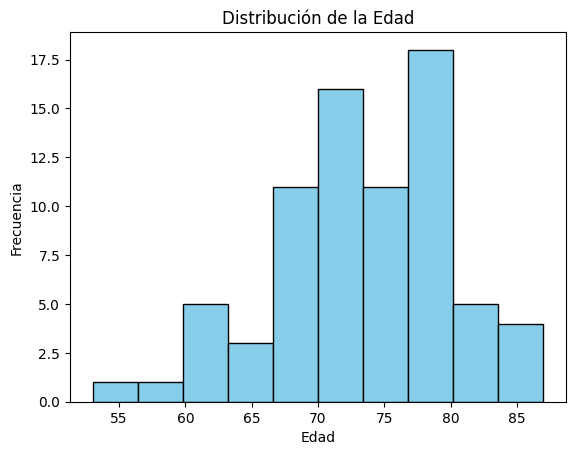

In [ ]:
df['Edad'].plot(kind='hist', bins=10, title='Distribución de la Edad', color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

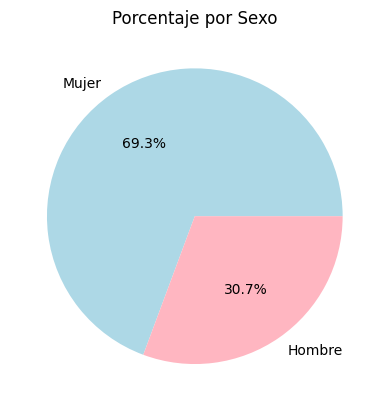

In [ ]:
df['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'], title='Porcentaje por Sexo')
plt.ylabel('')
plt.show()

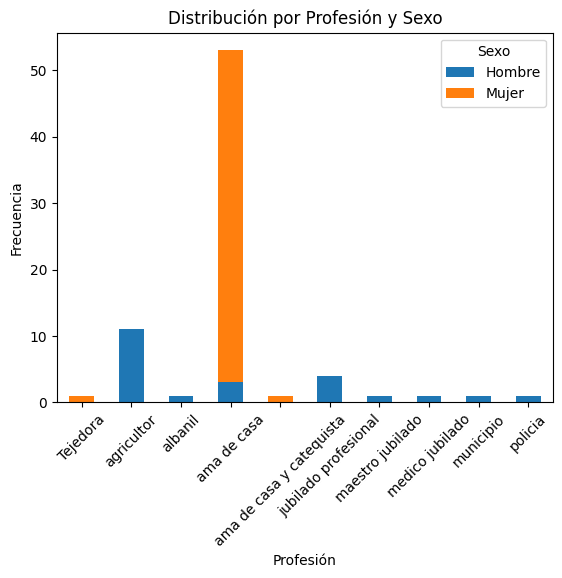

In [ ]:
df.groupby(['Profesion', 'Sexo']).size().unstack().plot(kind='bar', stacked=True, title='Distribución por Profesión y Sexo')
plt.xlabel('Profesión')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

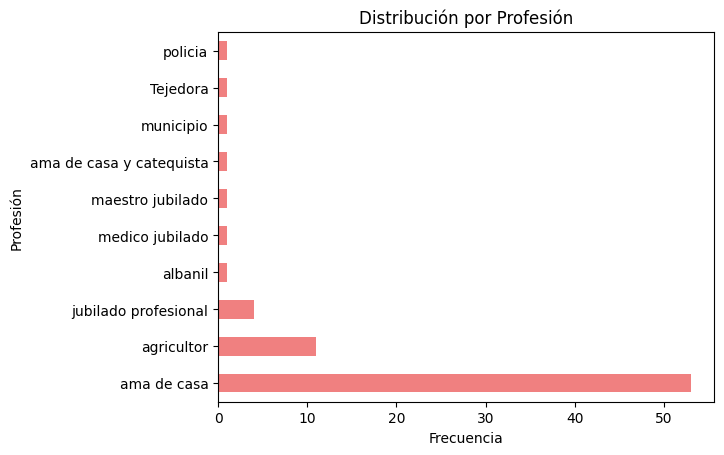

In [ ]:
df['Profesion'].value_counts().plot(kind='barh', color='lightcoral', title='Distribución por Profesión')
plt.xlabel('Frecuencia')
plt.ylabel('Profesión')
plt.show()

<ipython-input-99-988a9a6e1ebc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ECivil', data=df, palette='Set2')


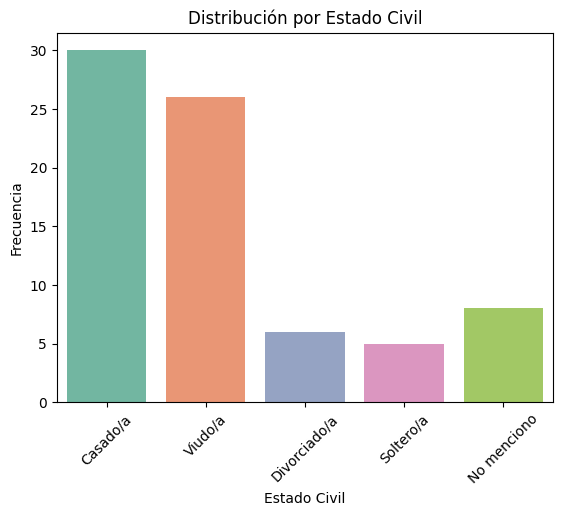

In [ ]:
sns.countplot(x='ECivil', data=df, palette='Set2')
plt.title('Distribución por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

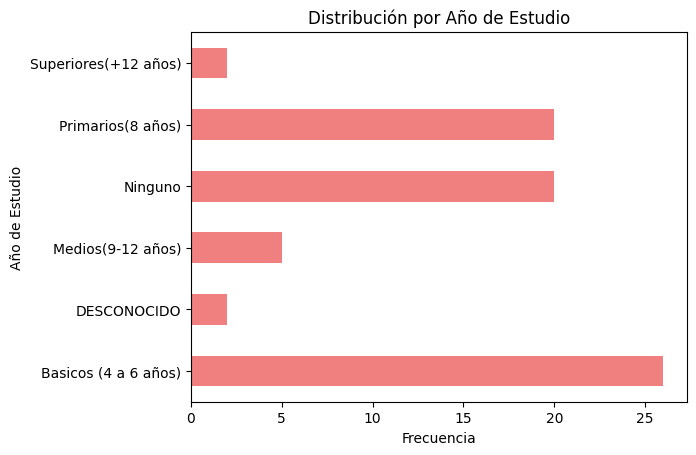

In [ ]:
df['AnioEstudio'].value_counts().sort_index().plot(kind='barh', color='lightcoral', title='Distribución por Año de Estudio')
plt.xlabel('Frecuencia')
plt.ylabel('Año de Estudio')
plt.show()


<ipython-input-101-215b3714d58d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Edad', data=df, palette='Set2')


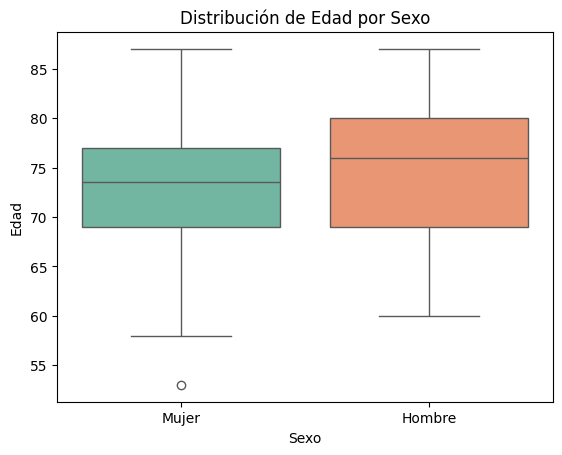

In [ ]:
sns.boxplot(x='Sexo', y='Edad', data=df, palette='Set2')
plt.title('Distribución de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

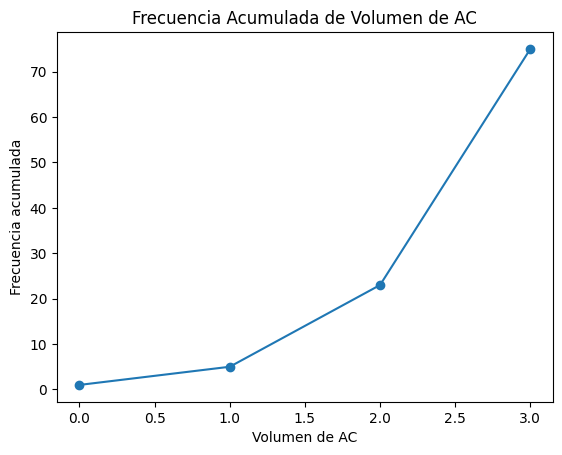

In [ ]:
# -1 = Desconocido.
df['VolumenAC'] = df['VolumenAC'].apply(lambda x: int(x) if str(x).isdigit() else -1)
df['VolumenAC'].value_counts().sort_index().cumsum().plot(kind='line', marker='o', title='Frecuencia Acumulada de Volumen de AC')
plt.xlabel('Volumen de AC')
plt.ylabel('Frecuencia acumulada')
plt.show()

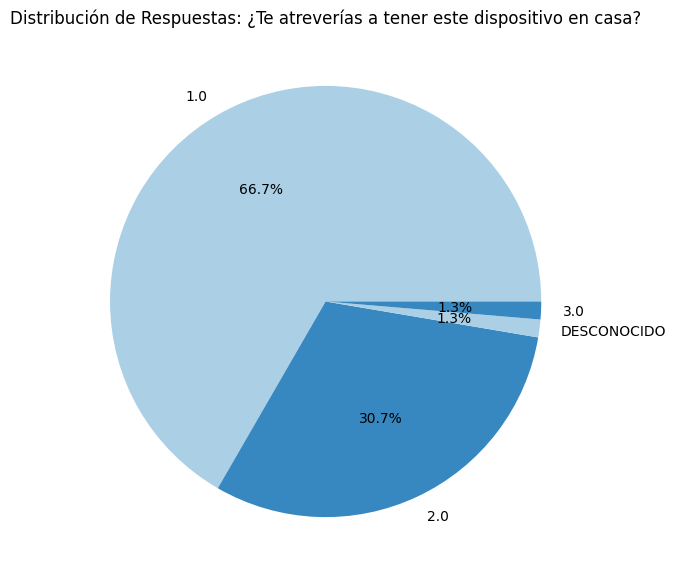

In [ ]:
item_counts = df['Item5PostSg'].value_counts()
item_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Blues", 2), figsize=(7, 7))
plt.title('Distribución de Respuestas: ¿Te atreverías a tener este dispositivo en casa?')
plt.ylabel('')
plt.show()

<ipython-input-137-efb80a418f70>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Item10PostSg', palette='Blues')


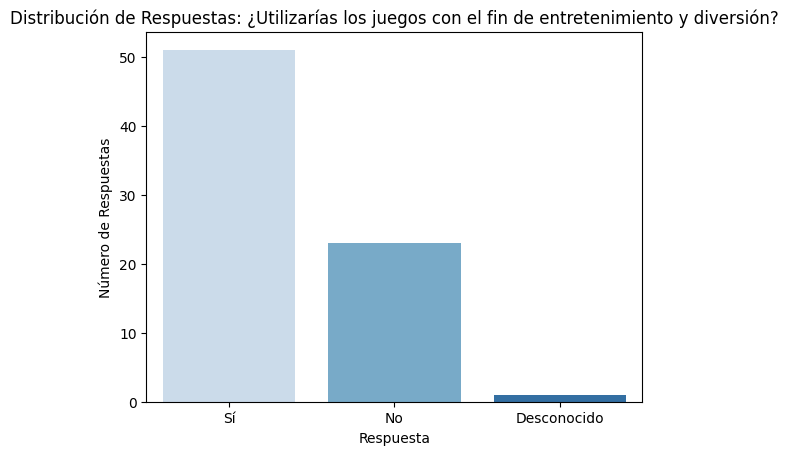

In [ ]:
sns.countplot(data=df, x='Item10PostSg', palette='Blues')
plt.title('Distribución de Respuestas: ¿Utilizarías los juegos con el fin de entretenimiento y diversión?')
plt.xlabel('Respuesta')
plt.ylabel('Número de Respuestas')
plt.xticks(ticks=[0, 1, 2], labels=['Sí', 'No', 'Desconocido'])
plt.show()

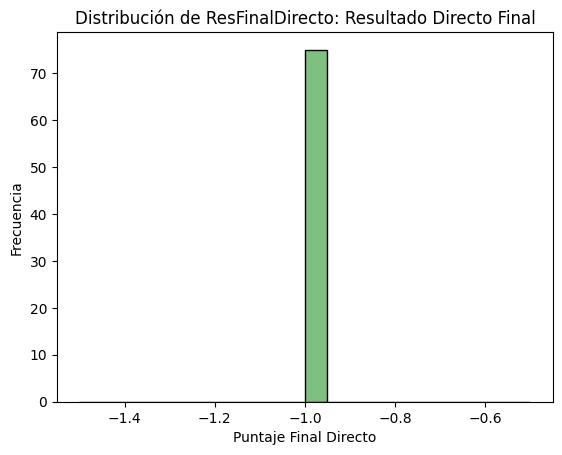

In [ ]:
df['ResFinalDirecto'] = df['ResFinalDirecto'].apply(lambda x: int(x) if str(x).isdigit() else -1)
sns.histplot(df['ResFinalDirecto'], kde=True, color='green', bins=20)
plt.title('Distribución de ResFinalDirecto: Resultado Directo Final')
plt.xlabel('Puntaje Final Directo')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-144-0970e45c1a6d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DSF', data=df, palette='viridis')


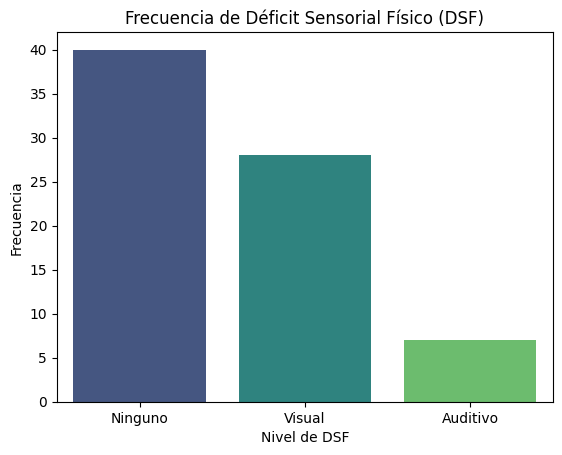

In [ ]:
sns.countplot(x='DSF', data=df, palette='viridis')
plt.title('Frecuencia de Déficit Sensorial Físico (DSF)')
plt.xlabel('Nivel de DSF')
plt.ylabel('Frecuencia')
plt.show()

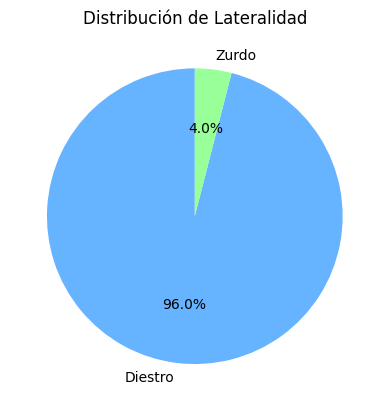

In [ ]:
df['Lateralidad'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'], startangle=90)
plt.title('Distribución de Lateralidad')
plt.ylabel('')
plt.show()

<br>
<hr>
<p><b>EXPORTACION DE LOS DATOS TRATADOS</b></p>
<hr>
<br>

In [ ]:
dic_datos_df = pd.DataFrame(list(dic_datos.items()), columns=['Abreviaciones', 'Descripción'])

with pd.ExcelWriter('/content/sample_data/datos_limpios.xlsx') as writer:
  df.to_excel(writer, sheet_name='Data', index=False)
  dic_datos_df.to_excel(writer, sheet_name='DiccionarioDatos', index=False)